# Clustering channels by correlation

The goal here is to cluster channels in a multichannel recording together based on how correlated they are.

In [1]:
import numpy as np
import pandas as pd
import physutils as phys
import physutils.bootstrap as boot
import physutils.tf as tf
import matplotlib.pyplot as plt
import dbio
import scipy.cluster.hierarchy as clus
import scipy.spatial.distance as dist
%matplotlib inline

Grab some LFP data:

In [2]:
import os
dbname = os.path.expanduser('data/bart.hdf5')
dtup = 18, 1
lfp = dbio.fetch_all_such_LFP(dbname, *dtup)

Next order of business: get rid of artifacts.

In [3]:
lfp = lfp.censor()

In [4]:
lfp = lfp.interpolate().fillna(0)

In [5]:
# array fed to corrcoef has variables in rows
Rmat = np.corrcoef(lfp.values.T)

In [6]:
D = 1 - Rmat ** 2

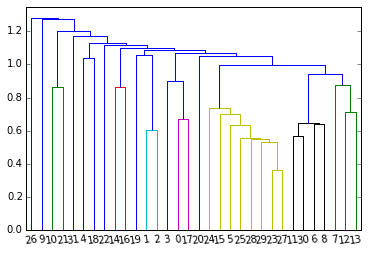

In [7]:
Z = clus.linkage(D)
dend = clus.dendrogram(Z);

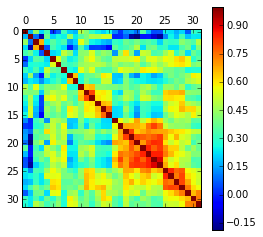

In [8]:
Rsorted = Rmat[np.ix_(dend['leaves'], dend['leaves'])]
plt.matshow(Rsorted);
plt.colorbar();

In [9]:
np.ix_(dend['leaves'], dend['leaves'])

(array([[26],
        [ 9],
        [10],
        [21],
        [31],
        [ 4],
        [18],
        [22],
        [14],
        [16],
        [19],
        [ 1],
        [ 2],
        [ 3],
        [ 0],
        [17],
        [20],
        [24],
        [15],
        [ 5],
        [25],
        [28],
        [29],
        [23],
        [27],
        [11],
        [30],
        [ 6],
        [ 8],
        [ 7],
        [12],
        [13]]),
 array([[26,  9, 10, 21, 31,  4, 18, 22, 14, 16, 19,  1,  2,  3,  0, 17, 20,
         24, 15,  5, 25, 28, 29, 23, 27, 11, 30,  6,  8,  7, 12, 13]]))